In [1]:
import sys

import matplotlib.pyplot as plt
import json

import numpy as np

# import dysts
# from dysts.flows import *
# from dysts.base import *
# from dysts.utils import *
# from dysts.analysis import *

# try:
#     from private.lyap import lyap_r, lyap_e, corr_dim
# except:
#     from nolds import lyap_r, lyap_e, corr_dim


%load_ext autoreload
%autoreload 2

## Symbolic regression

Available benchmarks

+ Eureqa Python API (could not get this to work)
+ PySR
+ pySINDY
+ AI Feynman 2.0

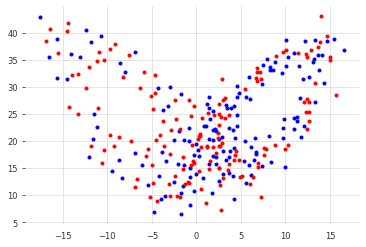

In [18]:
from dysts.flows import Lorenz
from dysts.analysis import sample_initial_conditions

n_train = 150
model = Lorenz()

ic_train, ic_test = sample_initial_conditions(model, 2, traj_length=1000, pts_per_period=30)

model.ic = ic_train
tvals, sol = model.make_trajectory(n_train, pts_per_period=15, resample=True, return_times=True, standardize=False)
dt = np.median(np.diff(tvals))
dsol = np.vstack(model.rhs(sol, 0)).T * dt
y_train = dsol[:, 0]
X_train = sol

model.ic = ic_test
tvals, sol = model.make_trajectory(n_train, pts_per_period=15, resample=True, return_times=True, standardize=False)
dt = np.median(np.diff(tvals))
dsol = np.vstack(model.rhs(sol, 0)).T * dt
y_test = dsol[:, 0]
X_test = sol

ndim = X_train.shape[-1]

plt.plot(X_train[:, 0], X_train[:, 2], '.b')
plt.plot(X_test[:, 0], X_test[:, 2], '.r')

In [100]:
import dysts
from dysts.flows import *
from dysts.base import *
from dysts.utils import *
from dysts.analysis import *
import json 

# cwd = os.path.dirname(os.path.realpath(__file__))
cwd = "."
# dataname = os.path.splitext(os.path.basename(os.path.split(input_path)[-1]))[0]
output_path = cwd + "/results/symbolic_scores.json"



# actual, predicted order
metric_calc = lambda x0, x1 :  smape(TimeSeries.from_dataframe(pd.DataFrame(x0)), TimeSeries.from_dataframe(pd.DataFrame(x1)))



try:
    with open(output_path, "r") as file:
        sym_scores = json.load(file)
except FileNotFoundError:
    sym_scores = dict()

for i, equation_name in enumerate(get_attractor_list()):
# for i, equation_name in enumerate(["Lorenz"]):
    print(equation_name)
    
    if equation_name in sym_scores.keys():
        print(f"Entry for {equation_name} found, skipping it.")
        continue
    
    
    
    model = getattr(dysts.flows, equation_name)()
    sym_scores[equation_name] = dict()
    
    ic_train, ic_test = sample_initial_conditions(model, 2, traj_length=1000, pts_per_period=30)

    model.ic = ic_train
    tvals, sol = model.make_trajectory(n_train, pts_per_period=15, resample=True, return_times=True, standardize=False)
    dt = np.median(np.diff(tvals))
    dsol = np.vstack([model.rhs(val, 0) for val in sol])# * dt
    y_train = dsol[:, 0]
    X_train = sol

    model.ic = ic_test
    tvals, sol = model.make_trajectory(n_train, pts_per_period=15, resample=True, return_times=True, standardize=False)
    dt = np.median(np.diff(tvals))
    dsol = np.vstack([model.rhs(val, 0) for val in sol])# * dt
    y_test = dsol[:, 0]
    X_test = sol

    ndim = X_train.shape[-1]
    
    
    ## SINDY
    import pysindy as ps
    sym_model = ps.SINDy()
    sym_model.fit(X_train, t=tvals)
    y_test_pred = sym_model.predict(X_test)[:, 0]
    sym_scores[equation_name]["SINDY"] = metric_calc(y_test, y_test_pred)
    
#     break
    
    with open(output_path, 'w') as f:
        json.dump(sym_scores, f, indent=4)   
    

Aizawa
Entry for Aizawa found, skipping it.
AnishchenkoAstakhov
Entry for AnishchenkoAstakhov found, skipping it.
Arneodo
Entry for Arneodo found, skipping it.
ArnoldBeltramiChildress
Entry for ArnoldBeltramiChildress found, skipping it.
ArnoldWeb
Entry for ArnoldWeb found, skipping it.
BeerRNN
Entry for BeerRNN found, skipping it.
BelousovZhabotinsky
Entry for BelousovZhabotinsky found, skipping it.
BickleyJet
Entry for BickleyJet found, skipping it.
Blasius
Entry for Blasius found, skipping it.
BlinkingRotlet
Entry for BlinkingRotlet found, skipping it.
BlinkingVortex
Entry for BlinkingVortex found, skipping it.
Bouali
Entry for Bouali found, skipping it.
Bouali2
Entry for Bouali2 found, skipping it.
BurkeShaw
Entry for BurkeShaw found, skipping it.
CaTwoPlus
Entry for CaTwoPlus found, skipping it.
CaTwoPlusQuasiperiodic
Entry for CaTwoPlusQuasiperiodic found, skipping it.
CellCycle
Entry for CellCycle found, skipping it.
CellularNeuralNetwork
Entry for CellularNeuralNetwork found, s

/Users/williamgilpin/miniconda3/envs/symb/lib/python3.8/site-packages/dysts/base.py:152: UserWarning: Expect slowdown due to excessive integration required; scale factor 1801.8431108114187
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")
/Users/williamgilpin/miniconda3/envs/symb/lib/python3.8/site-packages/dysts/base.py:152: UserWarning: Expect slowdown due to excessive integration required; scale factor 3603.686221622837
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")
/Users/williamgilpin/miniconda3/envs/symb/lib/python3.8/site-packages/dysts/base.py:152: UserWarning: Expect slowdown due to excessive integration required; scale factor 3603.686221622837
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")
/Users/williamgilpin/miniconda3/envs/symb/lib

Lorenz
Lorenz84


/Users/williamgilpin/miniconda3/envs/symb/lib/python3.8/site-packages/dysts/base.py:152: UserWarning: Expect slowdown due to excessive integration required; scale factor 1149.4214876033059
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")
/Users/williamgilpin/miniconda3/envs/symb/lib/python3.8/site-packages/dysts/base.py:152: UserWarning: Expect slowdown due to excessive integration required; scale factor 1149.4214876033059
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


Lorenz96


/Users/williamgilpin/miniconda3/envs/symb/lib/python3.8/site-packages/dysts/base.py:152: UserWarning: Expect slowdown due to excessive integration required; scale factor 1025.6302521008402
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


LorenzBounded
LorenzCoupled
LorenzStenflo
LuChen


/Users/williamgilpin/miniconda3/envs/symb/lib/python3.8/site-packages/dysts/base.py:152: UserWarning: Expect slowdown due to excessive integration required; scale factor 1282.0723684210525
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")
/Users/williamgilpin/miniconda3/envs/symb/lib/python3.8/site-packages/dysts/base.py:152: UserWarning: Expect slowdown due to excessive integration required; scale factor 1282.0723684210525
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


LuChenCheng
MacArthur


/Users/williamgilpin/miniconda3/envs/symb/lib/python3.8/site-packages/pysindy/optimizers/stlsq.py:173: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(
/Users/williamgilpin/miniconda3/envs/symb/lib/python3.8/site-packages/pysindy/optimizers/stlsq.py:173: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(
/Users/williamgilpin/miniconda3/envs/symb/lib/python3.8/site-packages/pysindy/optimizers/stlsq.py:173: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(
/Users/williamgilpin/miniconda3/envs/symb/lib/python3.8/site-packages/pysindy/optimizers/stlsq.py:173: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(
/Users/williamgilpin/miniconda3/envs/symb/lib/python3.8/site-packages/pysindy/optimizers/stlsq.py:173: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.w

MackeyGlass
MooreSpiegel
MultiChua
NewtonLiepnik
NoseHoover
NuclearQuadrupole
OscillatingFlow


/Users/williamgilpin/miniconda3/envs/symb/lib/python3.8/site-packages/dysts/base.py:166: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn("This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.")
/Users/williamgilpin/miniconda3/envs/symb/lib/python3.8/site-packages/dysts/base.py:166: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn("This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.")
/Users/williamgilpin/miniconda3/envs/symb/

PanXuZhou
PehlivanWei
PiecewiseCircuit
Qi
QiChen
RabinovichFabrikant
RayleighBenard
RikitakeDynamo
Rossler
Rucklidge
Sakarya
SaltonSea
SanUmSrisuchinwong
ScrollDelay
ShimizuMorioka
SprottA
SprottB
SprottC
SprottD
SprottDelay
SprottE
SprottF
SprottG
SprottH
SprottI
SprottJ
SprottJerk
SprottK
SprottL
SprottM
SprottMore
SprottN
SprottO
SprottP
SprottQ
SprottR
SprottS
SprottTorus


/Users/williamgilpin/miniconda3/envs/symb/lib/python3.8/site-packages/dysts/base.py:152: UserWarning: Expect slowdown due to excessive integration required; scale factor 1449.3263034563563
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")
/Users/williamgilpin/miniconda3/envs/symb/lib/python3.8/site-packages/dysts/base.py:152: UserWarning: Expect slowdown due to excessive integration required; scale factor 1449.3263034563563
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


StickSlipOscillator


/Users/williamgilpin/miniconda3/envs/symb/lib/python3.8/site-packages/dysts/base.py:152: UserWarning: Expect slowdown due to excessive integration required; scale factor 1075.2666666666667
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")
/Users/williamgilpin/miniconda3/envs/symb/lib/python3.8/site-packages/dysts/base.py:166: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn("This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.")
/Users/williamgilpin/miniconda3/envs/symb/lib/python3.8/site-packages/dysts/base.py:152: UserWarning: Expect slowdown due to excessive integration required; scale factor 1075.2666666666667
  if upscale_

SwingingAtwood


/Users/williamgilpin/miniconda3/envs/symb/lib/python3.8/site-packages/dysts/base.py:166: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn("This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.")
/Users/williamgilpin/miniconda3/envs/symb/lib/python3.8/site-packages/dysts/base.py:166: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn("This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.")


Thomas


/Users/williamgilpin/miniconda3/envs/symb/lib/python3.8/site-packages/dysts/base.py:152: UserWarning: Expect slowdown due to excessive integration required; scale factor 1149.4332639370807
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")
/Users/williamgilpin/miniconda3/envs/symb/lib/python3.8/site-packages/dysts/base.py:152: UserWarning: Expect slowdown due to excessive integration required; scale factor 1149.4332639370807
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


ThomasLabyrinth


/Users/williamgilpin/miniconda3/envs/symb/lib/python3.8/site-packages/dysts/base.py:152: UserWarning: Expect slowdown due to excessive integration required; scale factor 1149.4252873563216
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


Torus


/Users/williamgilpin/miniconda3/envs/symb/lib/python3.8/site-packages/dysts/base.py:152: UserWarning: Expect slowdown due to excessive integration required; scale factor 1111.111111111111
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")
/Users/williamgilpin/miniconda3/envs/symb/lib/python3.8/site-packages/dysts/base.py:152: UserWarning: Expect slowdown due to excessive integration required; scale factor 1111.111111111111
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


Tsucs2
TurchinHanski


/Users/williamgilpin/miniconda3/envs/symb/lib/python3.8/site-packages/dysts/base.py:166: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn("This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.")
/Users/williamgilpin/miniconda3/envs/symb/lib/python3.8/site-packages/dysts/base.py:166: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn("This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.")


VallisElNino
VossDelay
WangSun


/Users/williamgilpin/miniconda3/envs/symb/lib/python3.8/site-packages/dysts/base.py:152: UserWarning: Expect slowdown due to excessive integration required; scale factor 1388.8717156105101
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")
/Users/williamgilpin/miniconda3/envs/symb/lib/python3.8/site-packages/dysts/base.py:152: UserWarning: Expect slowdown due to excessive integration required; scale factor 1388.8717156105101
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


WindmiReduced


/Users/williamgilpin/miniconda3/envs/symb/lib/python3.8/site-packages/pysindy/optimizers/stlsq.py:173: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(


YuWang
YuWang2
ZhouChen


/Users/williamgilpin/miniconda3/envs/symb/lib/python3.8/site-packages/dysts/base.py:152: UserWarning: Expect slowdown due to excessive integration required; scale factor 1190.478133714208
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")
/Users/williamgilpin/miniconda3/envs/symb/lib/python3.8/site-packages/dysts/base.py:152: UserWarning: Expect slowdown due to excessive integration required; scale factor 1190.478133714208
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


(array([44., 29., 11.,  9.,  8.,  3.,  6.,  2.,  3., 16.]),
 array([  0.36809715,  20.33128744,  40.29447772,  60.25766801,
         80.22085829, 100.18404858, 120.14723886, 140.11042915,
        160.07361943, 180.03680972, 200.        ]),
 <BarContainer object of 10 artists>)

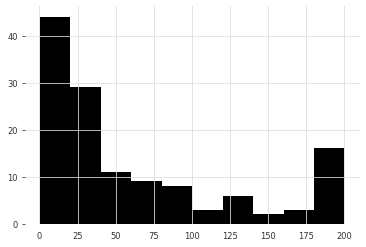

In [101]:
plt.hist([sym_scores[item]["SINDY"] for item in sym_scores])

In [5]:
import darts
from darts import TimeSeries
from darts.metrics import smape
from pysr import pysr, best
import pandas as pd



for i in range(ndim):

# Learn equations
equations = pysr(
    X_train,
    y_train,
    niterations=5,
    binary_operators=["+", "*"],
    unary_operators=[
        "cos",
        "exp",
        "sin",  # Pre-defined library of operators (see docs)
        "inv(x) = 1/x",  # Define your own operator! (Julia syntax)
    ],
    verbosity=0,
)
# print(best(equations))

best_ind = np.argmax(equations["score"].values) 
y_test_pred = equations["lambda_format"].iloc[best_ind](X_test)

print(metric_calc(y_test, y_test_pred))

-1.0072484*x0 + 1.0072483*x1


In [29]:
y_test_pred2.shape

(150, 3)

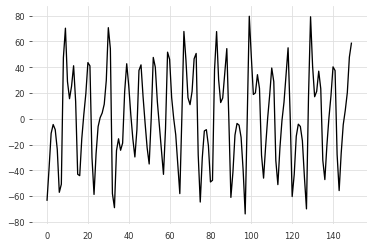

In [26]:
plt.plot(y_test_pred2[:, 0])

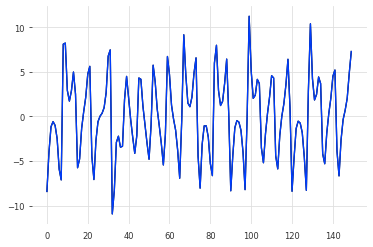

In [16]:
plt.plot(y_test_pred)
plt.plot(y_test)

## nODEs